In [1]:
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

In [2]:
filepath = "Vertical_Merge.csv"
df = pd.read_csv(filepath)
df.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health Life Expectancy,Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [4]:
df.columns

Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Social Support', 'Health Life Expectancy',
       'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Year'],
      dtype='object')

y = 0.46x + -0.18


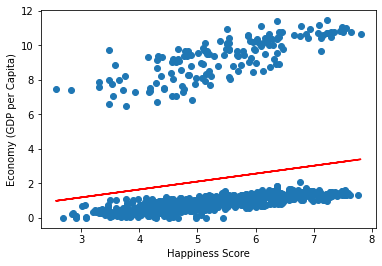

In [18]:
#all year scatter plot one for each group
x_value = df["Happiness Score"]
y_value = df["Economy (GDP per Capita)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

regression = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

plt.scatter(x_value, y_value)
plt.plot(x_value,regression,"r-")
plt.xlabel("Happiness Score")
plt.ylabel("Economy (GDP per Capita)")

plt.show()

In [ ]:
#2015 year scatterplot one for each group

In [ ]:
#2016 year scatterplot one for each group

In [ ]:
#2017 year scatterplot one for each group

In [ ]:
#2018 year scatterplot one for each group

In [ ]:
#2019 year scatterplot one for each group

In [ ]:
#2020 year scatterplot one for each group